In [1]:
#import impulsegpt_sdpa
import torch
from torch import nn
from torchinfo import summary
from transformers import AutoTokenizer
from matplotlib import pyplot as plt


In [2]:
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using CUDA")
    print(torch.cuda.get_device_capability())
elif torch.backends.mps.is_available():
    device = torch.device('mps')
    print("Using MPS")
else:
    print("Using CPU")


Using CUDA
(8, 6)


In [3]:
model = torch.load('ckpt/impgpt-128-final-1.pt', weights_only=False)
summary(model)

Layer (type:depth-idx)                   Param #
ImpulseGPT                               --
├─Embedding: 1-1                         38,597,376
├─ModuleList: 1-2                        --
│    └─Layer: 2-1                        --
│    │    └─RoPE: 3-1                    --
│    │    └─RoPE: 3-2                    --
│    │    └─Linear: 3-3                  589,824
│    │    └─Linear: 3-4                  196,608
│    │    └─Linear: 3-5                  196,608
│    │    └─Linear: 3-6                  590,592
│    │    └─Sequential: 3-7              4,722,432
│    │    └─Dropout: 3-8                 --
│    └─Layer: 2-2                        --
│    │    └─RoPE: 3-9                    --
│    │    └─RoPE: 3-10                   --
│    │    └─Linear: 3-11                 589,824
│    │    └─Linear: 3-12                 196,608
│    │    └─Linear: 3-13                 196,608
│    │    └─Linear: 3-14                 590,592
│    │    └─Sequential: 3-15             4,722,432
│    │   

In [4]:
#tokenizer = AutoTokenizer.from_pretrained('google-bert/bert-base-chinese')
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neo-125m")

In [12]:
start_ids = torch.tensor(tokenizer.encode('Once upon a time,')).unsqueeze(dim=0).to(device=device)
max_length = 120
y = model.generate(start_ids, max_length=max_length, top_k=8, temp=1.25)
print(y)
txt = tokenizer.decode(y[0].tolist(), skip_special_tokens=True)
print(y.shape)
print(txt)

tensor([[ 7454,  2402,   257,   640,    11,   612,   373,   257,  1310,  2576,
          3706, 22162,    13, 22162,   550,   257,  4004,  3654,    13,  1881,
          1110,    11,   673,  2227,   284,  1011,   607,  3654,   284,   262,
          3952,    13,   887,   607,  3654,   373,   407,   287,   262, 13373,
          3091,    13, 22162,  3088,   284,  1037,   607,  3654,    11,   475,
           262,  3654,   373,   991,  1165,  1263,    13,   198,   198, 25596,
           948,   338,  1995,   531,    11,   366,  3987,   470,  5490,    11,
           356,   481,   651,   345,   257,   649,  3654,   526,  1119,  1718,
           673,   284,   262, 13373,  3650,    13, 22162,  2497,   257,  1263,
            11,  2266,  3654,   351,   257,  2495,  6576,    13,  1375,  1965,
           607,  1995,    11,   366,  6090,   356,   423,   534,  3654,  1701,
          2332,  1995, 13541,   290,   531,    11,   366,  5297,    11,  1309,
           338,   467,  1363,  2474,   198]], device

tensor(612)


' there'

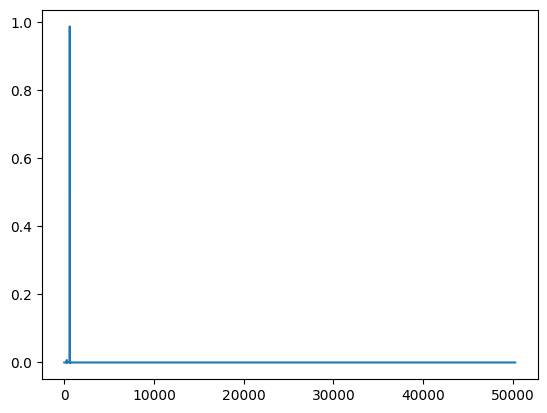

In [6]:
y = model(start_ids)
prob = nn.functional.softmax(y, dim=-1).cpu().detach().squeeze()
token_max = torch.argmax(prob)
print(token_max)
plt.plot(prob)
tokenizer.decode([token_max.tolist()])